In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vjtitask/sample_submission.csv
/kaggle/input/vjtitask/train.csv
/kaggle/input/vjtitask/test.csv


In [2]:
!pip install -q pyicu
!pip install -q pycld2
!pip install -q polyglot
!pip install -q textstat
!pip install -q googletrans


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.9/263.9 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 35.6 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
import textstat
from scipy import stats
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)


In [7]:
!pip install langdetect 
!pip install indic_transliteration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 3.3 MB/s eta 0:00:0000:01


In [23]:
from langdetect import detect
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate
from collections import Counter

# EDA! 
**visualizing and analysing the comments**

In [9]:
df1=pd.read_csv("/kaggle/input/vjtitask/train.csv")
df2=pd.read_csv("/kaggle/input/vjtitask/test.csv")
df_sample=pd.read_csv("/kaggle/input/vjtitask/sample_submission.csv")


In [10]:
df1

,id,text,complaint,demands,praise,questions
0,500796286320,Wow! From what I've observed from this documen...,0.0,0.0,1.0,0.0
1,838906157157,काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...,1.0,0.0,0.0,0.0
2,1011026626743,अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...,0.0,0.0,1.0,0.0
3,1068853499446,"She's saying that ""doing her own research"" led...",1.0,0.0,0.0,0.0
4,502772748919,"That is not Karen, that is perfectly reasonabl...",1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3995,815979127763,Why not just buy some oil platforms and start ...,0.0,0.0,0.0,1.0
3996,426508330840,अरे भाई हे तर सगळे हिंदीत बोलतात आणि राहता महा...,1.0,0.0,0.0,0.0
3997,1016442533101,सरकार ने जी योजना आणली आहे ती खरोखरच खूप चांगल...,1.0,0.0,0.0,0.0
3998,1096741594952,मुख्यमंत्री एकनाथ शिंदे यांच्या नेतृत्वाखाली म...,0.0,0.0,1.0,0.0


In [42]:
def get_language(text):
    return Detector("".join(x for x in text if x.isprintable()), quiet=True).languages[0].name

df1["language"] = df1["text"].progress_apply(get_language)
df1
df2["language"]=df2["text"].progress_apply(get_language)

100%|██████████| 2000/2000 [00:00<00:00, 10844.65it/s]


In [48]:
df2['language'].unique()

array(['Marathi', 'English', 'Hindi', 'Tagalog', 'Sinhala', 'Malayalam',
       'Galician', 'Gujarati', 'Norwegian Nynorsk'], dtype=object)

In [116]:
df1['language'].unique()

array(['Hinglish', 'Marathi', 'English', 'Hindi', 'Urdu', 'Malayalam',
       'Sinhala', 'Uzbek', 'Persian', 'Tagalog', 'Manx', 'Tamil'],
      dtype=object)

In [113]:
#def is_hinglish(text):
    hinglish_keywords = ['badiya','kya','kaise', 'bahut','raha']
    for word in hinglish_keywords:
        if word in text.lower():
            return True
    return False

#df1['language'] = df1.apply(lambda row: 'Hinglish' if is_hinglish(row['text']) else row['language'], axis=1)




In [115]:
#df1[df1['language']=="Hinglish"]

,id,text,complaint,demands,praise,questions,language,comment_words
0,500796286320,Wow! From what I've observed from this documen...,0.0,0.0,1.0,0.0,Hinglish,71
3,1068853499446,"She's saying that ""doing her own research"" led...",1.0,0.0,0.0,0.0,Hinglish,68
14,368811343090,Joey Naham Tesla knows that. They made the con...,1.0,0.0,0.0,0.0,Hinglish,67
40,1077297168532,For fry skin once a week use kar sakte ho Ek b...,0.0,1.0,0.0,0.0,Hinglish,53
62,538628429098,I think you need to redo this video again. The...,1.0,0.0,0.0,0.0,Hinglish,69
...,...,...,...,...,...,...,...,...
3951,112528482260,Thanks for this nice video! But I am not buyin...,0.0,0.0,1.0,0.0,Hinglish,79
3955,322031296144,I am french and i saw your performance . Your ...,0.0,0.0,1.0,0.0,Hinglish,78
3963,675152336833,I'm truly impressed by the intelligence of the...,0.0,0.0,1.0,0.0,Hinglish,64
3979,843502231714,enjoying am sure you do but what I am trying t...,0.0,0.0,1.0,0.0,Hinglish,75


ENGLISH vs NON_ENGLISH

In [85]:
lang_list = sorted(list(set(df1["language"])))
counts = [list(df1["language"]).count(cont) for cont in lang_list]
df = pd.DataFrame(np.transpose([lang_list, counts]))
df.columns = ["Languages", "Count"]
df["Count"] = df["Count"].apply(int)

df_en = pd.DataFrame(np.transpose([["English", "Non-English"], [max(counts), sum(counts) - max(counts)]]))
df_en.columns = ["Languages", "Count"]

fig = px.bar(df_en, x="Languages", y="Count", title="Language of comments", color="Languages", text="Count")
fig.update_layout(template="plotly_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[0].textfont.color = "black"
fig.data[0].textposition = "outside"
fig.data[1].textfont.color = "black"
fig.data[1].textposition = "outside"
fig

In [86]:
fig = px.bar(df.query("Languages != 'English' and Languages != 'un'").query("Count >= 0"),
             y="Languages", x="Count", title="Language of non-English comments", template="plotly_white", color="Languages", text="Count", orientation="h")
fig.update_traces(marker=dict(line=dict(width=0.75,
                                        color='black')),  textposition="outside")
fig.update_layout(showlegend=False)
fig

In [56]:
lang_list = sorted(list(set(df2["language"])))
counts = [list(df2["language"]).count(cont) for cont in lang_list]
df = pd.DataFrame(np.transpose([lang_list, counts]))
df.columns = ["Languages", "Count"]
df["Count"] = df["Count"].apply(int)

df_en = pd.DataFrame(np.transpose([["English", "Non-English"], [max(counts), sum(counts) - max(counts)]]))
df_en.columns = ["Languages", "Count"]

fig = px.bar(df.query("Languages != 'English' and Languages != 'un'").query("Count >= 0"),
             y="Languages", x="Count", title="Language of non-English comments", template="plotly_white", color="Languages", text="Count", orientation="h")
fig.update_traces(marker=dict(line=dict(width=0.75,
                                        color='black')),  textposition="outside")
fig.update_layout(showlegend=False)
fig

**After looking through the data we can see that some texts listed has english language has some hinglish text containing hindi words written in english like kya bhadiya etc**

**looks like test set contains some data rows with languages that are not present in training set.... needs to handle this somehow**

In [87]:
def new_len(x):
    if type(x) is str:
        return len(x.split())
    else:
        return 0

df1["comment_words"] = df1["text"].apply(new_len)
nums = df1.query("comment_words != 0 and comment_words < 200").sample(frac=0.1)["comment_words"]
fig = ff.create_distplot(hist_data=[nums],
                         group_labels=["All comments"],
                         colors=["coral"])

fig.update_layout(title_text="Comment words", xaxis_title="Comment words", template="simple_white", showlegend=False)
fig.show()

**Visualization of most occuring words in all the four categories of classfication**

In [21]:
# Function to get all text for a specific category
def get_text_by_category(df, category_column):
    """
    Combine all the text data corresponding to a specific binary category column.
    """
    texts = df[df[category_column] == 1]['text'].values
    return " ".join(texts)

# Function to get frequent words
def get_frequent_words(text, top_n=20):
    """
    Get the top N frequent words from the text.
    """
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

def generate_word_cloud(text, category_name):
    """
    Generate and display a word cloud for a given category.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_name}", fontsize=16)
    plt.show()
    
def plot_top_words(text, category_name, top_n=20):
    """
    Plot a bar chart of the most frequent words for a given category.
    """
    frequent_words = get_frequent_words(text, top_n=top_n)
    words, counts = zip(*frequent_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {top_n} Words in {category_name}", fontsize=16)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()



Processing category: complaint


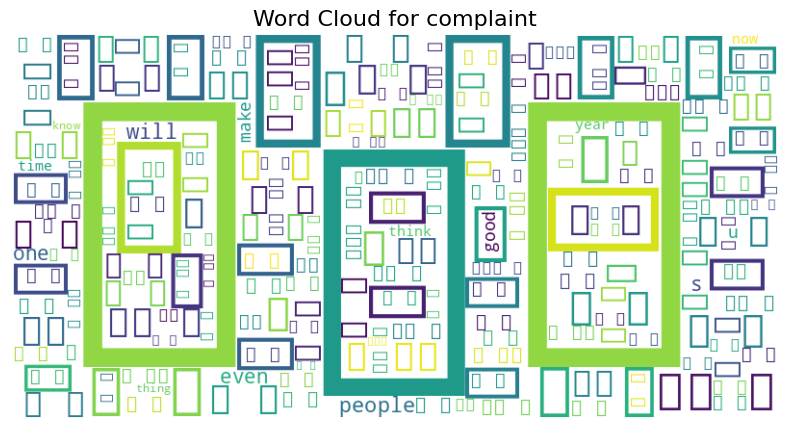

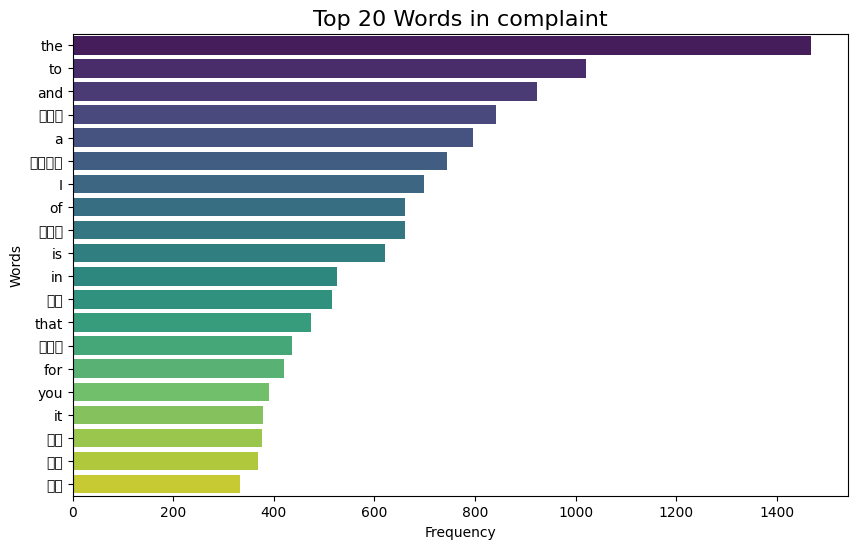

Processing category: demands


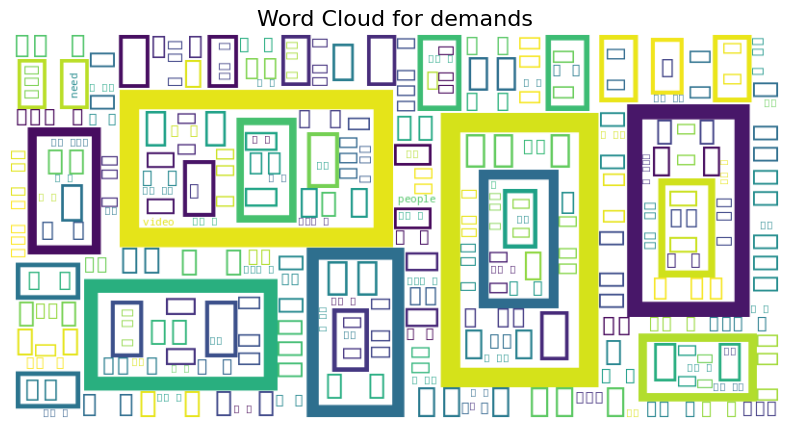

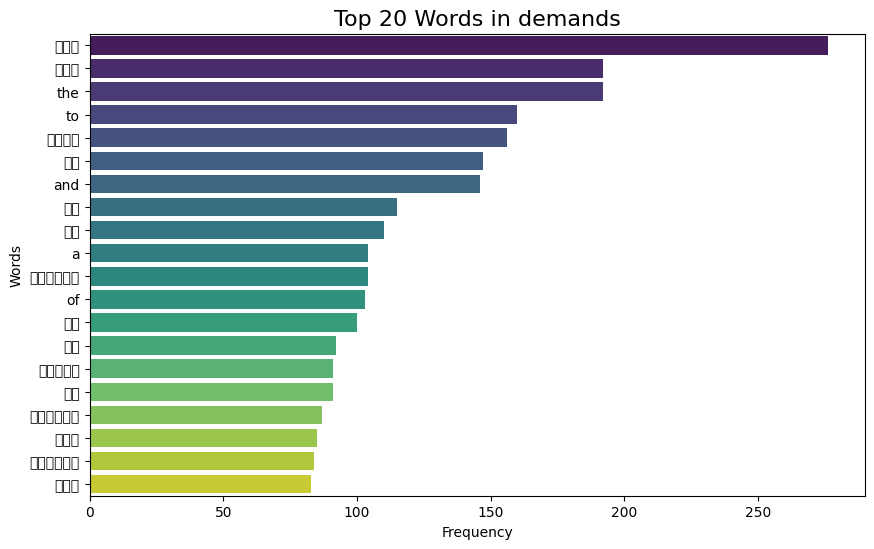

Processing category: praise


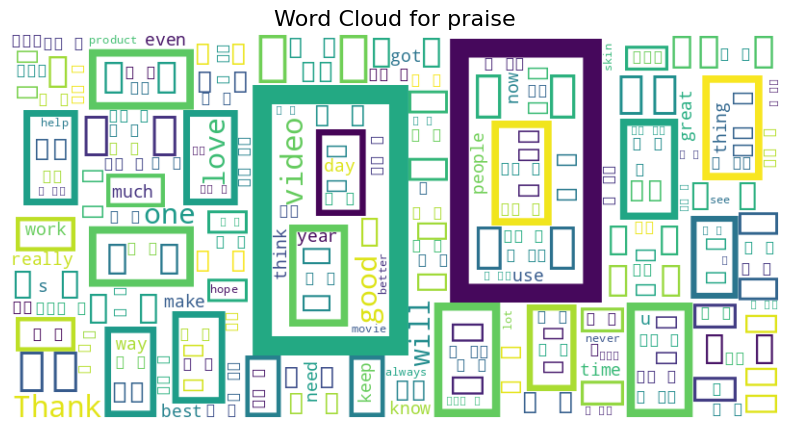

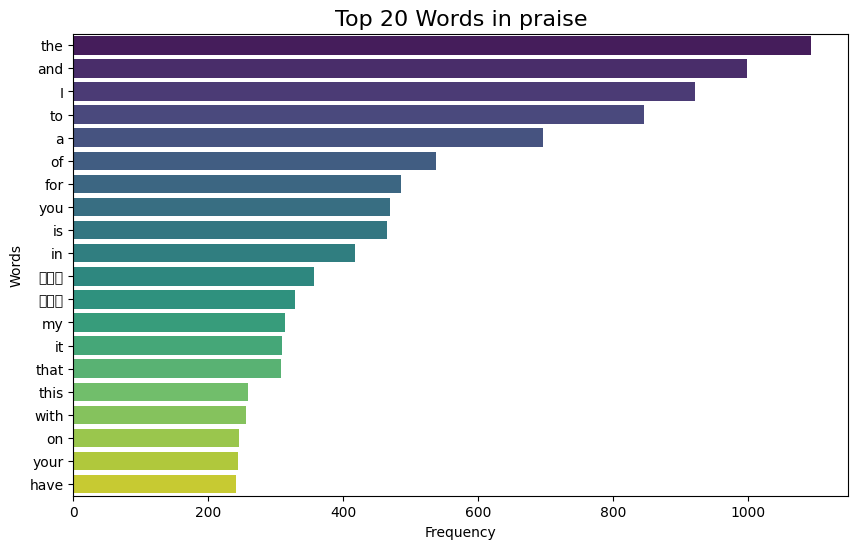

Processing category: questions


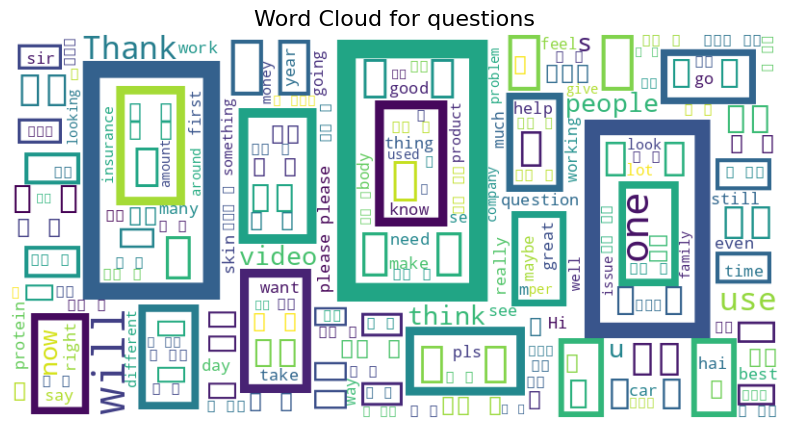

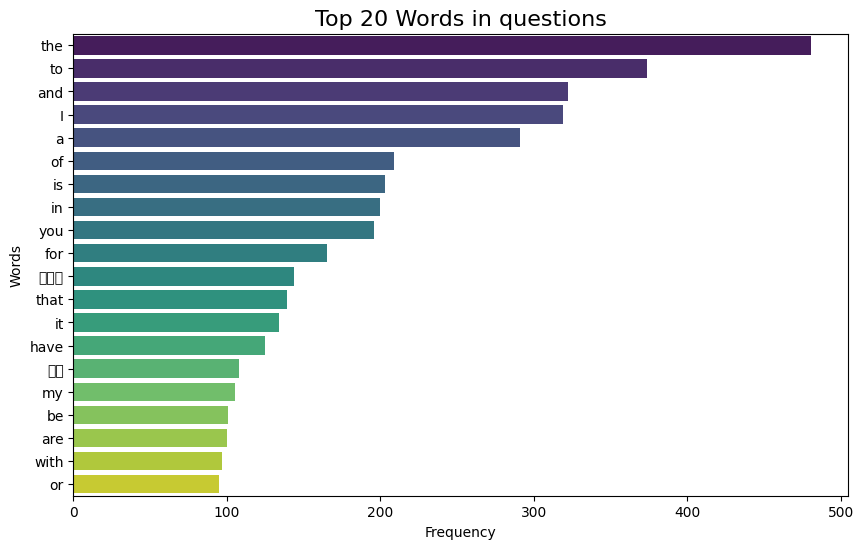

In [70]:
# List of category columns
category_columns = ['complaint','demands','praise','questions']

for category in category_columns:
    print(f"Processing category: {category}")
    
    # Get text for this category
    category_text = get_text_by_category(df1, category)
    
    # Generate Word Cloud
    generate_word_cloud(category_text, category)
    
    # Plot Top Words
    plot_top_words(category_text, category, top_n=20)


Category: complaint, Language: Urdu
Category: complaint, Language: Malayalam


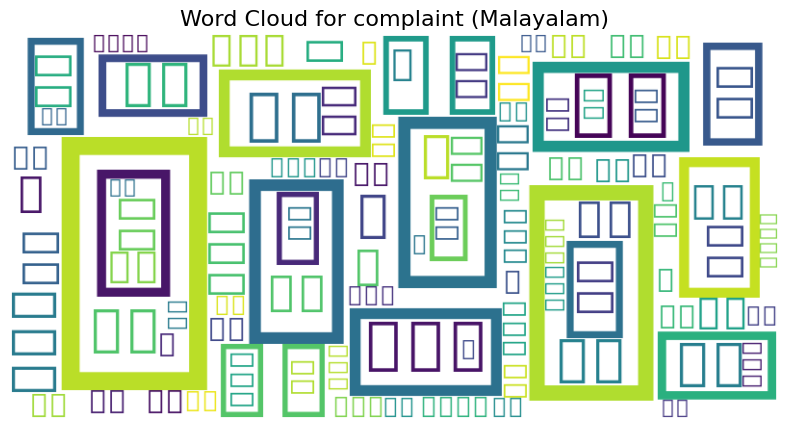

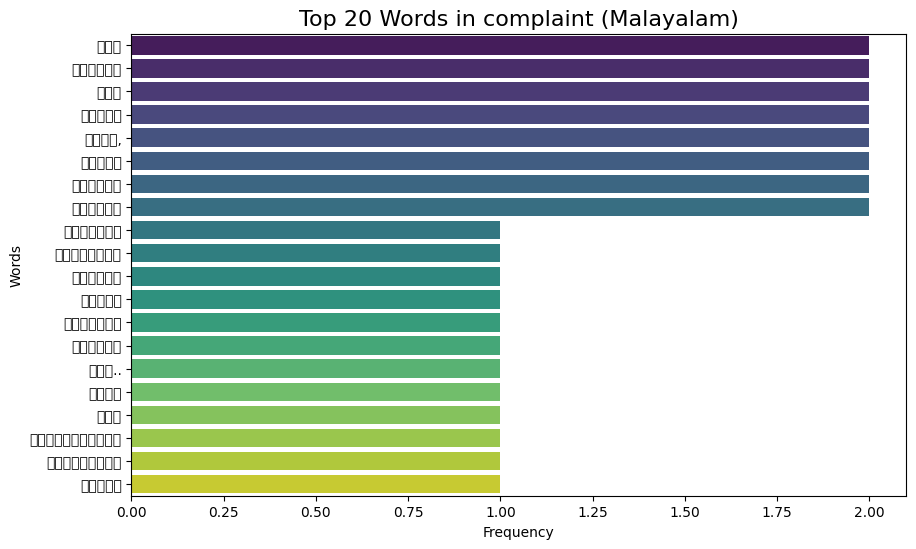

Category: complaint, Language: Sinhala
Category: complaint, Language: Uzbek
Category: complaint, Language: Afar
Category: complaint, Language: Persian
Category: complaint, Language: Czech
Category: complaint, Language: Southern Sotho
Category: complaint, Language: un
Category: complaint, Language: Tagalog


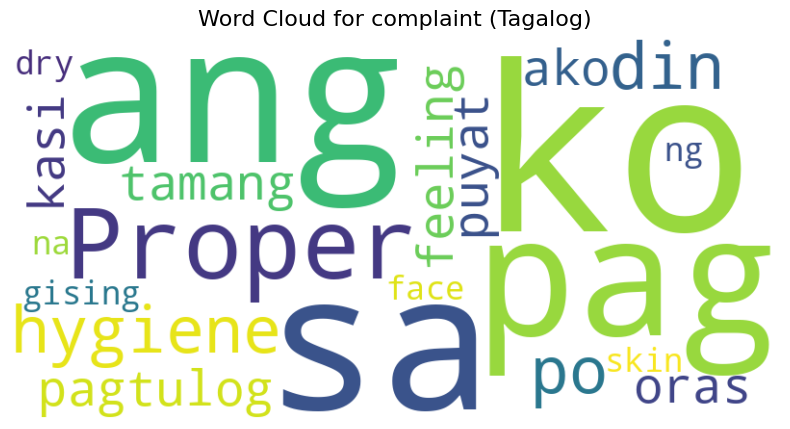

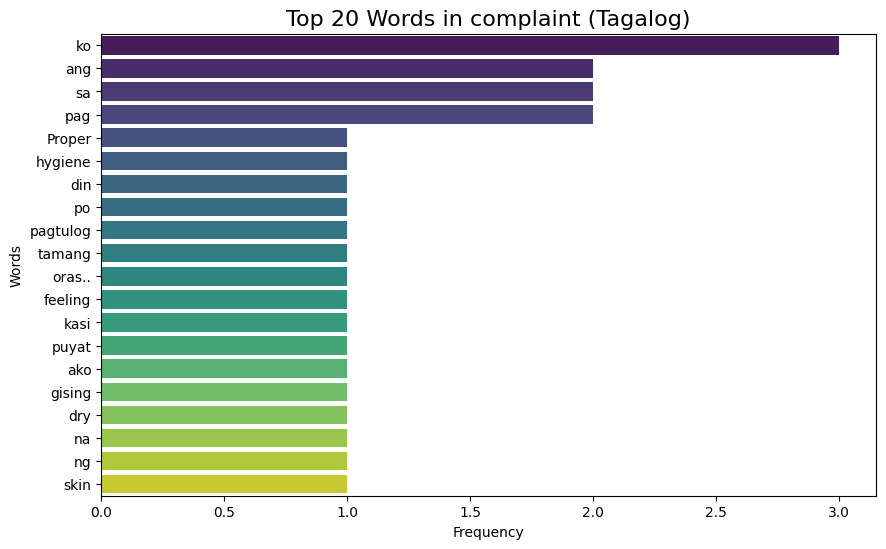

Category: complaint, Language: Indonesian


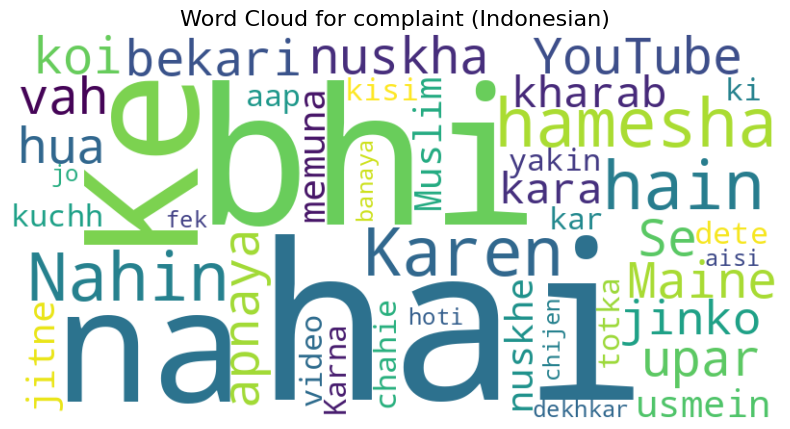

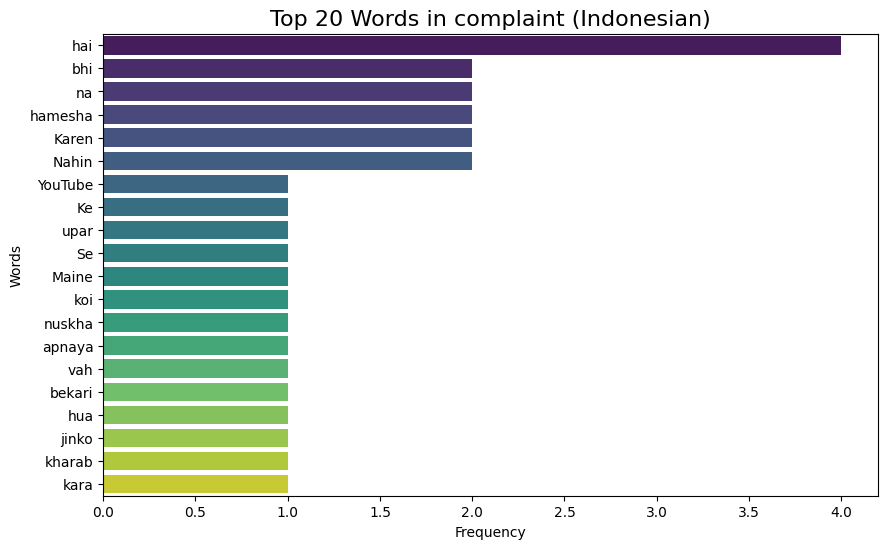

Category: complaint, Language: Manx
Category: complaint, Language: Akan
Category: complaint, Language: Tamil
Category: complaint, Language: Scottish Gaelic
Category: demands, Language: Urdu
Category: demands, Language: Malayalam


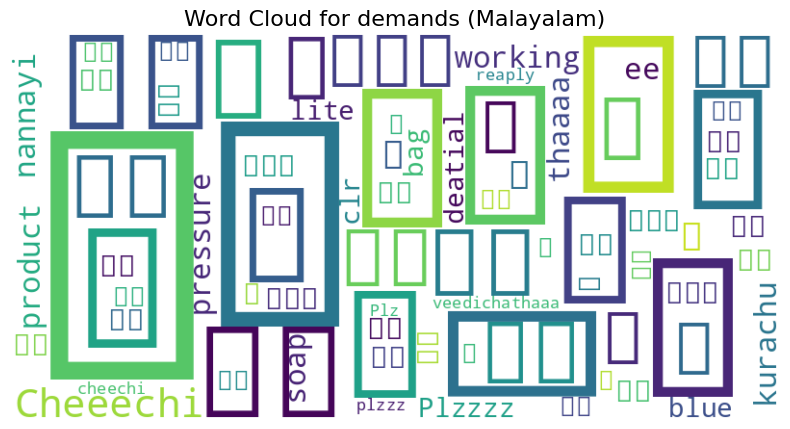

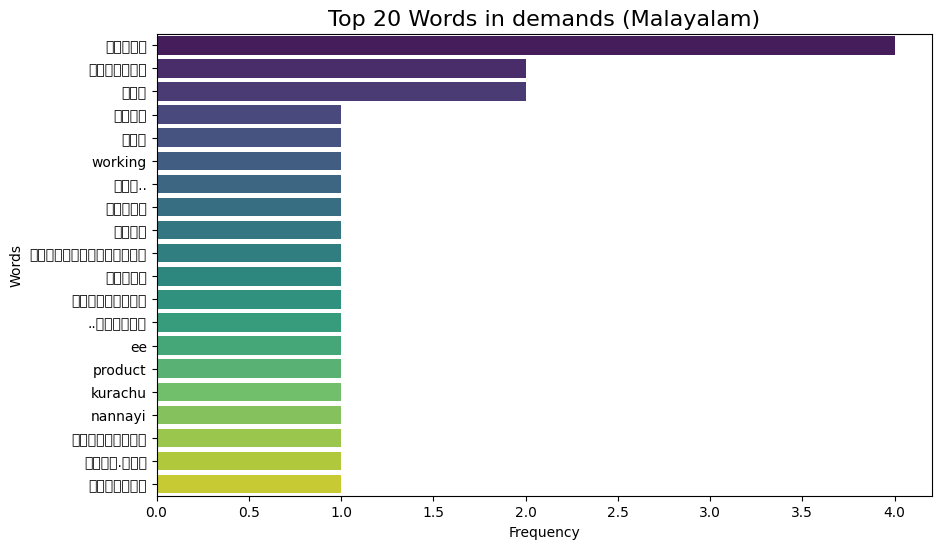

Category: demands, Language: Sinhala
Category: demands, Language: Uzbek
Category: demands, Language: Afar
Category: demands, Language: Persian
Category: demands, Language: Czech
Category: demands, Language: Southern Sotho
Category: demands, Language: un


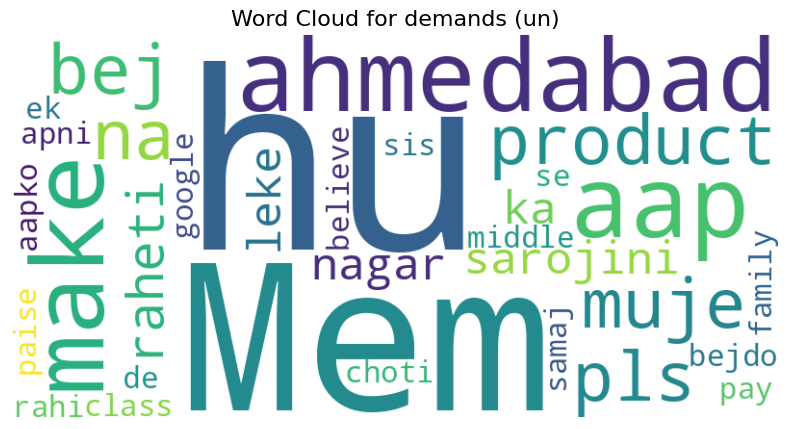

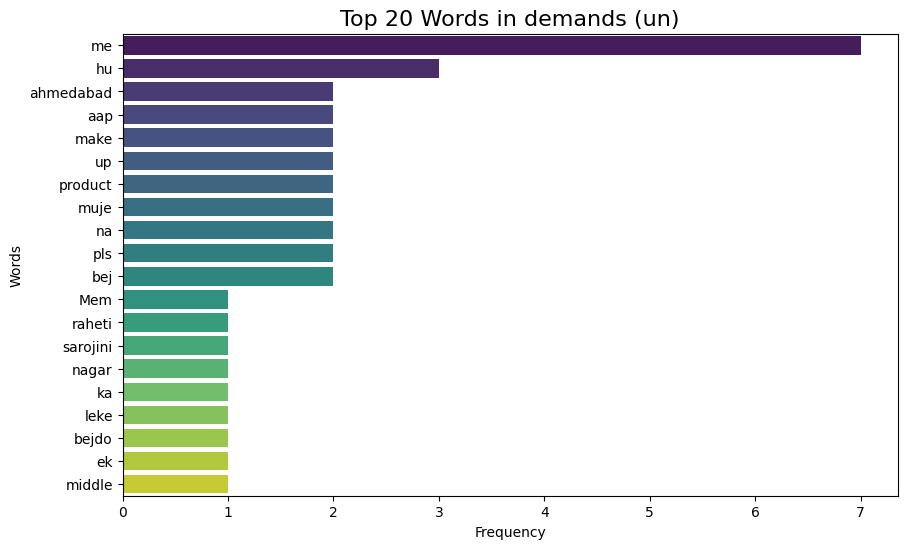

Category: demands, Language: Tagalog
Category: demands, Language: Indonesian
Category: demands, Language: Manx
Category: demands, Language: Akan
Category: demands, Language: Tamil
Category: demands, Language: Scottish Gaelic
Category: praise, Language: Urdu
Category: praise, Language: Malayalam


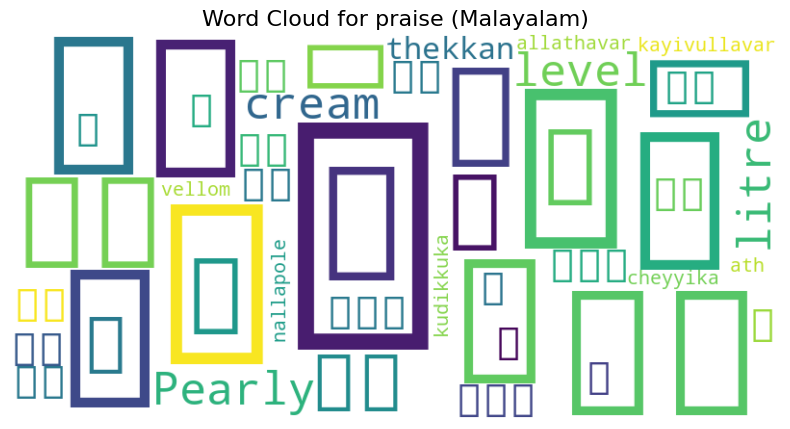

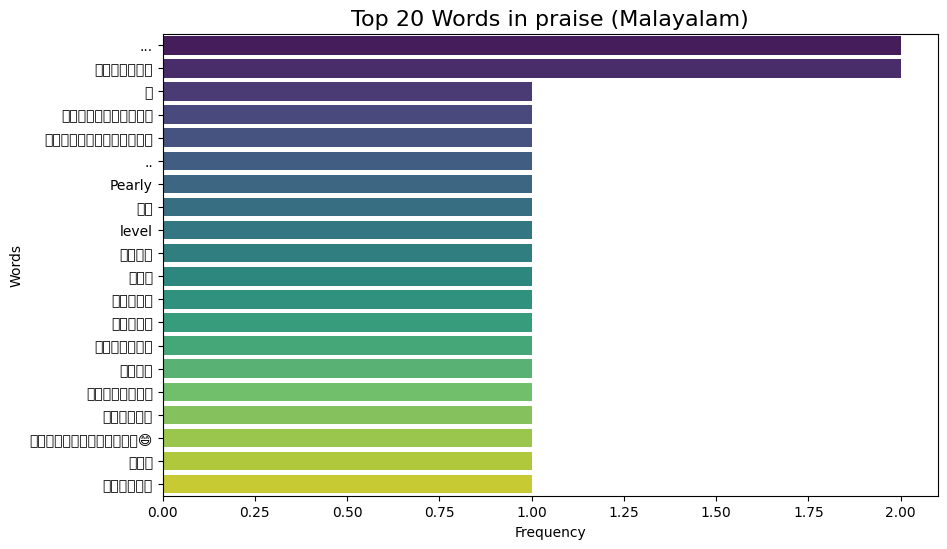

Category: praise, Language: Sinhala
Category: praise, Language: Uzbek
Category: praise, Language: Afar
Category: praise, Language: Persian
Category: praise, Language: Czech
Category: praise, Language: Southern Sotho
Category: praise, Language: un
Category: praise, Language: Tagalog


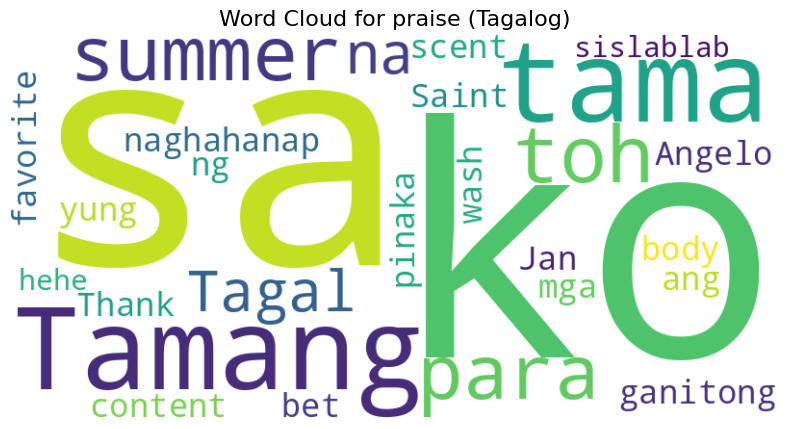

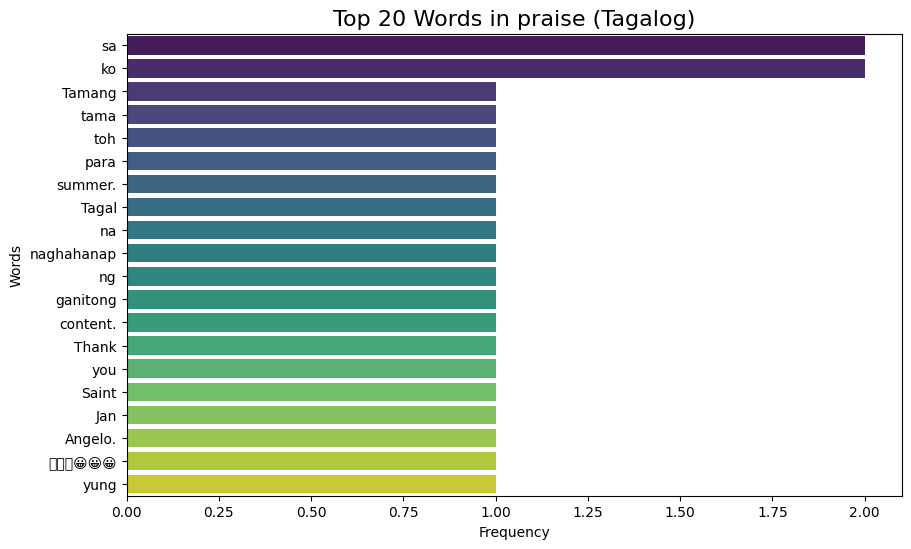

Category: praise, Language: Indonesian


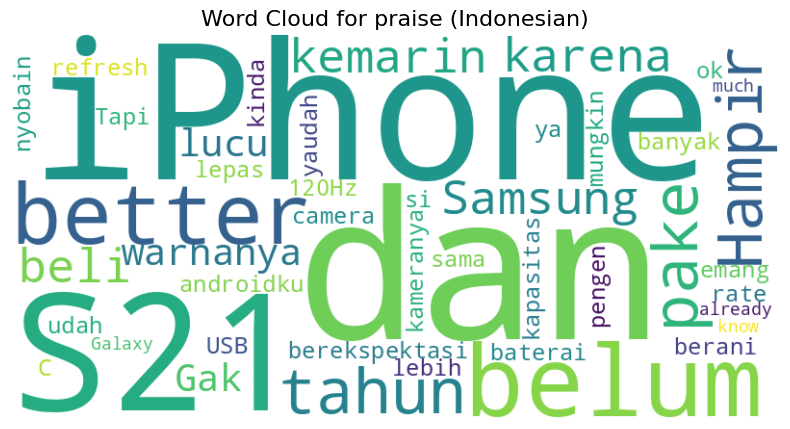

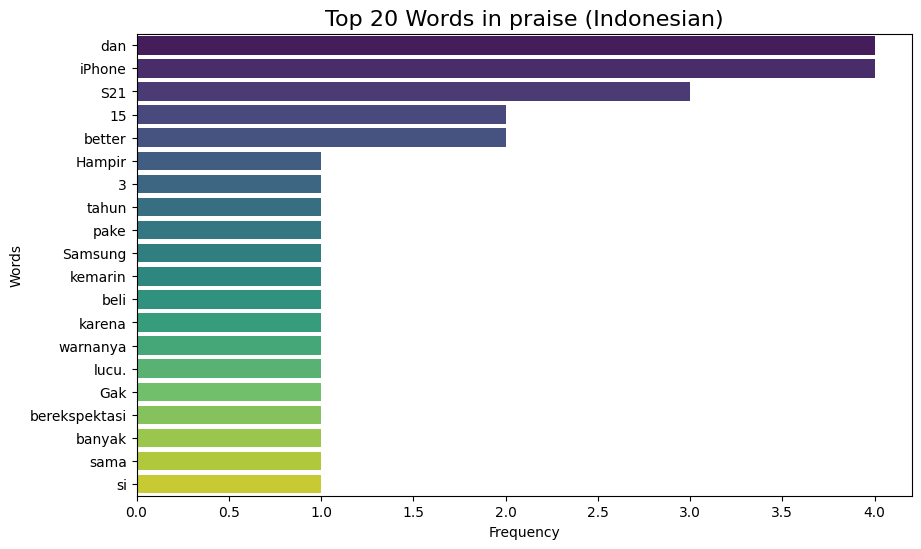

Category: praise, Language: Manx
Category: praise, Language: Akan
Category: praise, Language: Tamil
Category: praise, Language: Scottish Gaelic
Category: questions, Language: Urdu
Category: questions, Language: Malayalam
Category: questions, Language: Sinhala


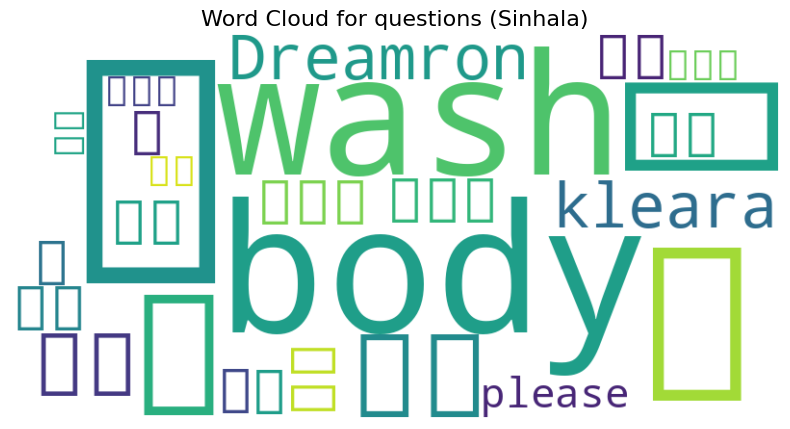

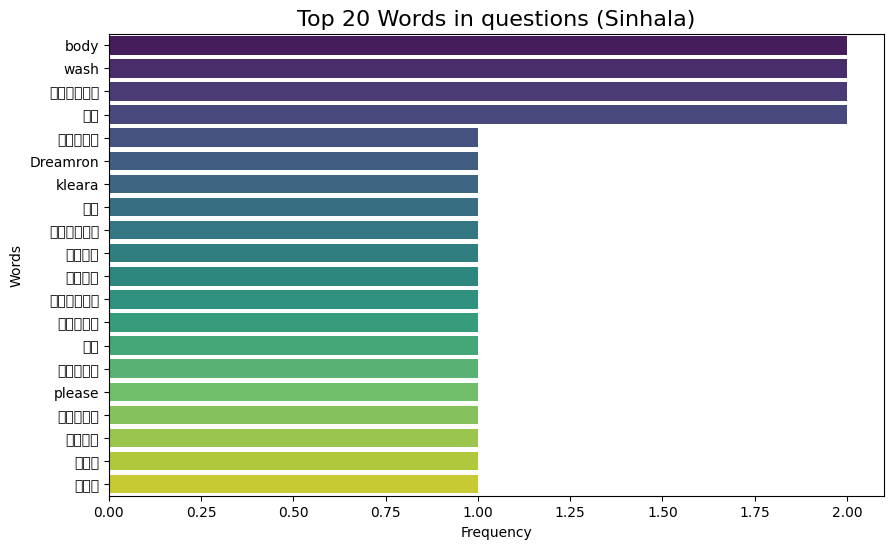

Category: questions, Language: Uzbek
Category: questions, Language: Afar
Category: questions, Language: Persian
Category: questions, Language: Czech
Category: questions, Language: Southern Sotho
Category: questions, Language: un
Category: questions, Language: Tagalog


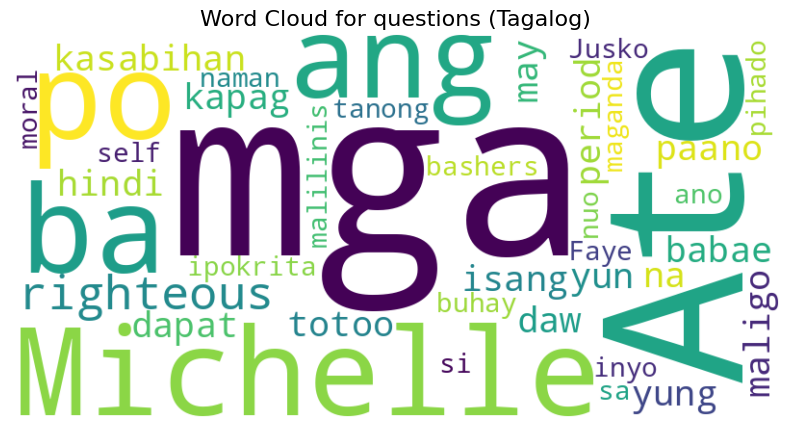

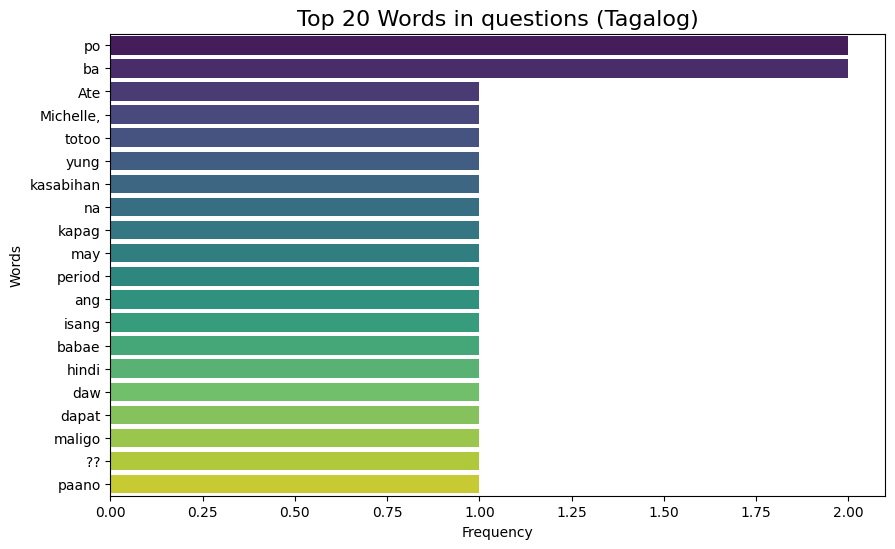

Category: questions, Language: Indonesian
Category: questions, Language: Manx
Category: questions, Language: Akan
Category: questions, Language: Tamil
Category: questions, Language: Scottish Gaelic


In [74]:
def get_text_by_language_and_category(df, category, language):
    """
    Get all text data for a specific category and language.
    """
    texts = df[(df[category] == 1) & (df['language'] == language)]['text'].values
    return " ".join(texts)

# Example for generating word clouds for all languages
languagess = ['Urdu', 'Malayalam', 'Sinhala',
       'Uzbek', 'Afar', 'Persian', 'Czech', 'Southern Sotho', 'un',
       'Tagalog', 'Indonesian', 'Manx', 'Akan', 'Tamil',
       'Scottish Gaelic']  # Add detected languages here

for category in category_columns:
    for language in languagess:
        print(f"Category: {category}, Language: {language}")
        
        # Get text for this language and category
        language_category_text = get_text_by_language_and_category(df1_filtered, category, language)
        
        if language_category_text:  # Check if there is text for this combination
            # Generate Word Cloud
            generate_word_cloud(language_category_text, f"{category} ({language})")
            
            # Plot Top Words
            plot_top_words(language_category_text, f"{category} ({language})", top_n=20)


In [88]:
df1

,id,text,complaint,demands,praise,questions,language,comment_words
0,500796286320,Wow! From what I've observed from this documen...,0.0,0.0,1.0,0.0,Hinglish,71
1,838906157157,काय रे dungnat मेंदु असणाऱ्या आंधभक्ता तुझा आई...,1.0,0.0,0.0,0.0,Marathi,53
2,1011026626743,अजित दादा आणि प्रफुल्ल पटेल यांनी केलेल्या काम...,0.0,0.0,1.0,0.0,Marathi,12
3,1068853499446,"She's saying that ""doing her own research"" led...",1.0,0.0,0.0,0.0,Hinglish,68
4,502772748919,"That is not Karen, that is perfectly reasonabl...",1.0,0.0,0.0,0.0,English,67
...,...,...,...,...,...,...,...,...
3995,815979127763,Why not just buy some oil platforms and start ...,0.0,0.0,0.0,1.0,English,72
3996,426508330840,अरे भाई हे तर सगळे हिंदीत बोलतात आणि राहता महा...,1.0,0.0,0.0,0.0,Marathi,23
3997,1016442533101,सरकार ने जी योजना आणली आहे ती खरोखरच खूप चांगल...,1.0,0.0,0.0,0.0,Marathi,63
3998,1096741594952,मुख्यमंत्री एकनाथ शिंदे यांच्या नेतृत्वाखाली म...,0.0,0.0,1.0,0.0,Marathi,12


In [67]:
labels_remove=['Uzbek', 'Afar', 'Czech', 'Southern Sotho','Urdu','Tamil','Akan','Persian','Scottish Gaelic','Manx']

In [68]:
df1_filtered = df1[~df1['language'].isin(labels_remove)]
df1_filtered['language'].unique()

array(['English', 'Marathi', 'Hindi', 'Malayalam', 'Sinhala', 'un',
       'Tagalog', 'Indonesian'], dtype=object)

In [123]:
!pip install indic-nlp-library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 9.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 46.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [129]:
import string
from indicnlp.transliterate.unicode_transliterate import UnicodeIndicTransliterator
from indicnlp.tokenize import indic_tokenize


def process_english_text(text):
    """
    Preprocess English text: remove stopwords, lowercase, and strip punctuation.
    """
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower()) 
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return " ".join(tokens)


#def process_hinglish_text(text):
    """
    Preprocess Hinglish text by transliterating and cleaning it.
    """
   # try:
        #transliterated = UnicodeIndicTransliterator.transliterate(text, 'h', 'en')
       # tokens = word_tokenize(transliterated.lower())
      #  tokens = [word for word in tokens if word not in string.punctuation]
     #   return " ".join(tokens)
   # except Exception as e:
    #    return text.lower()

def process_hindi_text(text):
    """
    Preprocess Hindi text: tokenize and remove punctuations.
    """
    try:
        tokens = list(indic_tokenize.trivial_tokenize(text))
        tokens = [word for word in tokens if word not in string.punctuation]
        return " ".join(tokens)
    except Exception as e:
        return text
        
def process_marathi_text(text):
    """
    Preprocess Marathi text: tokenize and remove punctuations.
    """
    try:
        tokens = list(indic_tokenize.trivial_tokenize(text))
        tokens = [word for word in tokens if word not in string.punctuation]
        return " ".join(tokens)
    except Exception as e:
        return text
def process_minor_language_text(text):
    """
    Preprocess text in minority languages by removing punctuation and normalizing.
    """
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)



In [130]:
def process_text_by_language(row):
    """
    Process text based on the detected language.
    """
    lang = row['language']
    text = row['text']

    if lang == 'English':
        return process_english_text(text)
    #elif lang == 'Hinglish':
        #return process_hinglish_text(text)
    elif lang == 'Hindi':
        return process_hindi_text(text)
    elif lang == 'Marathi':
        return process_marathi_text(text)
    elif lang in ['Malayalam', 'Sinhala', 'un', 'Tagalog', 'Indonesian', 'Scottish Gaelic']:
        return process_minor_language_text(text)
    else:
        return text  


In [131]:
import nltk


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
df1_filtered['processed_text'] = df1_filtered.apply(process_text_by_language, axis=1)


**Tokenization**

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X = tfidf_vectorizer.fit_transform(df1_filtered['processed_text'])


**Embedding**

In [137]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.9 MB/s eta 0:00:0000:01


In [138]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # Multilingual embedding model
X = embedder.encode(df1_filtered['processed_text'].tolist())


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, df1_filtered[['complaint','demands','praise','questions']], test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict_proba(X_test)
#auc_scores = {col: roc_auc_score(y_test[col], y_pred[:, i]) for i, col in enumerate(['complaint','demands','praise','questions'])}

#print("AUC Scores:", auc_scores)
